# K-Means Clustering

- Clustering is an unsupervised machine learning technique used to group similar data points together based on their features.
-  The primary goal of clustering is to discover the underlying structure or patterns within a dataset without prior knowledge of the group labels.

### K-Means clustering is one of the most popular clustering algorithm used for analysis of unlabeled data.
-  It aims to partition a dataset into k clusters, where each data point belongs to the cluster with the nearest mean (centroid).
- The algorithm seeks to minimize the `Within-Cluster Sum of Squares (WCSS)`, which is the sum of the squared distances between each data point and its assigned cluster centroid.

Advantages of this technique include:
- Simplicity
- Scalability
- Speed (Based on initialization)

Applications of K-Means
- Customer Segmentation: Grouping customers based on purchasing behavior or demographics.
- Image Segmentation: Dividing an image into regions for analysis or compression.
- Document Clustering: Organizing documents into topics or themes.
- Anomaly Detection: Identifying unusual data points that do not fit into any cluster.


### In today's discussion, we'll be going through a visualization on K-Means clustering and how exactly it works under the hood.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [14]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.6)

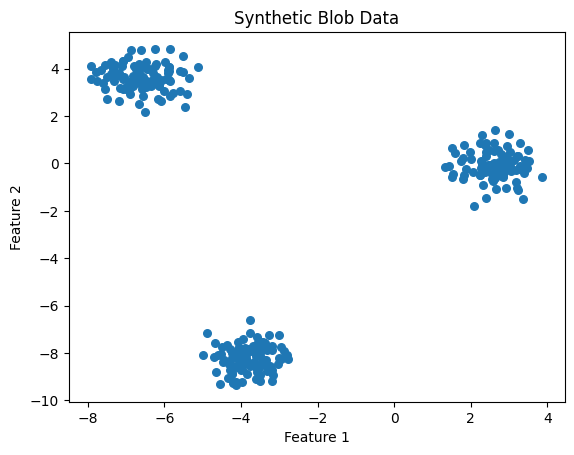

In [15]:
plt.scatter(X[:,0], X[:, 1], s=30)
plt.title('Synthetic Blob Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
X.shape[0]

300

In [17]:
#here we're using the random initialization
print(X[0])
centroids = X[np.random.choice(X.shape[0], 3, replace=False)]
print("Initial centroids: ", centroids)
cluster_history = []
for _ in range(1):
    #X[:, np.newaxis]: This adds a new axis to X, transforming it from a shape of (n_samples, n_features) to (n_samples, 1, n_features)
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)    #computes the euclidean distance along the feature axis. results in shape (n_samples, k)
    print("Distance of data point 1 from the centroids: ", distances[0])
    labels = np.argmin(distances, axis=1)                               #takes that index with smallest distance to a centroid
    print("Closest cluster: ", labels[0])
    cluster_history.append((centroids.copy(), labels.copy()))
    new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(3)])
    print("Centroids after 1 iteration: ", new_centroids)


[3.50999684 0.1098213 ]
Initial centroids:  [[-7.39279561  3.78182806]
 [-6.24073423  3.39924392]
 [-7.01370464  3.21340201]]
Distance of data point 1 from the centroids:  [11.50454331 10.29062959 10.97180505]
Closest cluster:  1
Centroids after 1 iteration:  [[-7.25492518  4.01597455]
 [-1.19012837 -1.31528728]
 [-5.10227801 -4.66597069]]


In [18]:
X[:, np.newaxis] - centroids    #difference between each data point and each centroid, resulting in an array of shape (n_samples, k, n_features)

array([[[10.90279245, -3.67200675],
        [ 9.75073106, -3.28942262],
        [10.52370147, -3.10358071]],

       [[10.45331192, -4.10402054],
        [ 9.30125053, -3.72143641],
        [10.07422094, -3.5355945 ]],

       [[ 0.44008078,  0.71871528],
        [-0.71198061,  1.10129941],
        [ 0.0609898 ,  1.28714132]],

       ...,

       [[ 1.03488575, -0.53320204],
        [-0.11717563, -0.1506179 ],
        [ 0.65579477,  0.03522401]],

       [[ 0.3216608 , -0.63443411],
        [-0.83040058, -0.25184997],
        [-0.05743017, -0.06600807]],

       [[ 9.95784951, -4.2438013 ],
        [ 8.80578813, -3.86121716],
        [ 9.57875854, -3.67537526]]])

In [19]:
# function that performs k-means clustering
def k_means(X, k, max_iters=10):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    cluster_history = []
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)    #computes the euclidean distance along the feature axis. results in shape (n_samples, k)
        labels = np.argmin(distances, axis=1)                               #takes that index with smallest distance to a centroid
        cluster_history.append((centroids.copy(), labels.copy()))
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):  # Check for convergence
            break
        centroids = new_centroids
    return labels, centroids, cluster_history

In [20]:
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1, random_state=42)
k = 4
labels, final_centroids, history = k_means(X, k)

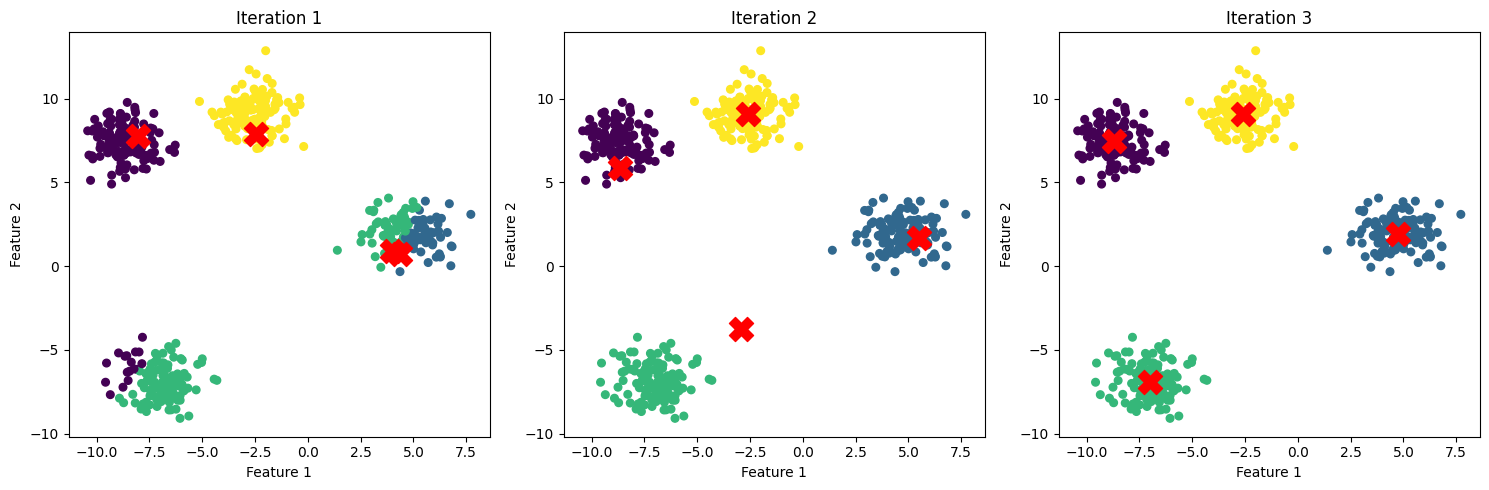

In [21]:
num_iterations = len(history)
fig, axs = plt.subplots(1, num_iterations, figsize=(15, 5))
for i, (centroids, labels) in enumerate(history):
    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    axs[i].scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
    axs[i].set_title(f'Iteration {i + 1}')
    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()

## K-Means ++

- k-Means++ is an enhancement of the traditional k-means clustering algorithm that improves the selection of initial centroids
- This method aims to address the sensitivity of k-means to the initial placement of centroids, which can affect the `quality and convergence speed` of the clustering process

In [23]:
def initialize_centroids(X, k):
    n_samples = X.shape[0]
    centroids = np.empty((k, X.shape[1]))

    # Randomly choose the first centroid
    centroids[0] = X[np.random.choice(n_samples)]

    for i in range(1, k):
        # Compute distances from each point to the nearest centroid
        distances = np.min(np.linalg.norm(X[:, np.newaxis] - centroids[:i], axis=2), axis=1)
        # Choose the next centroid with a probability proportional to the square of the distance
        probabilities = distances**2 / np.sum(distances**2)
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        for j, p in enumerate(cumulative_probabilities):
            if r < p:
                centroids[i] = X[j]
                break
                
    return centroids

In [24]:
# function that performs k-means clustering
def k_means_pp(X, k, max_iters=10):
    centroids = initialize_centroids(X, k)
    cluster_history = []
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)    #computes the euclidean distance along the feature axis. results in shape (n_samples, k)
        labels = np.argmin(distances, axis=1)                               #takes that index with smallest distance to a centroid
        cluster_history.append((centroids.copy(), labels.copy()))
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):  # Check for convergence
            break
        centroids = new_centroids
    return labels, centroids, cluster_history

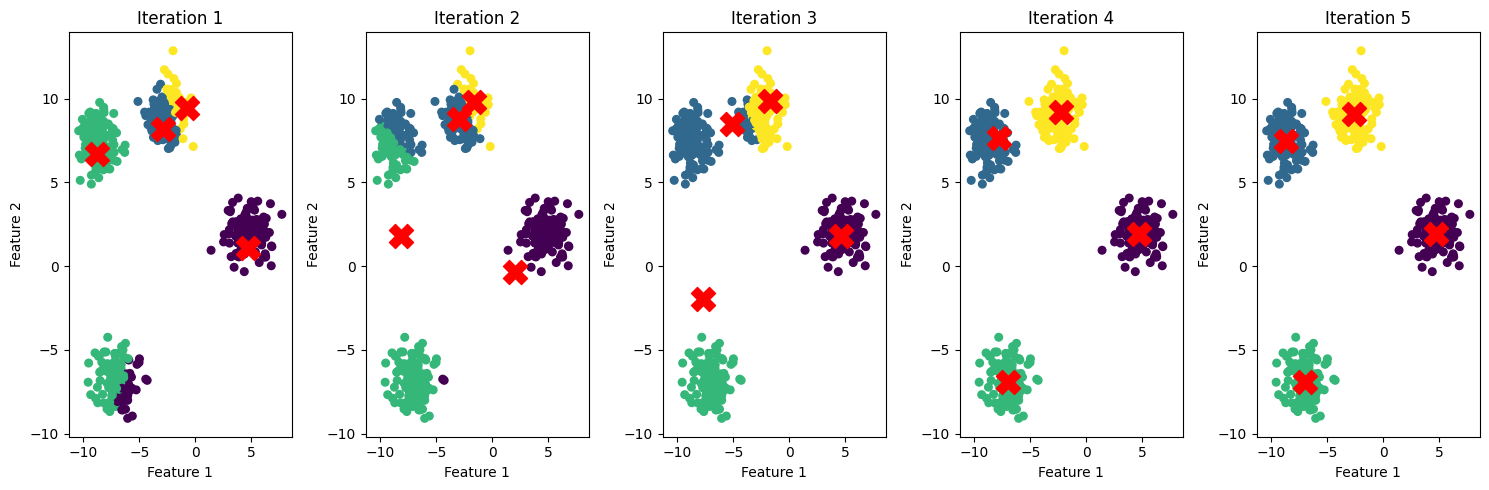

In [25]:
k = 4
labels_kpp, final_centroids_kpp, history_kpp = k_means(X, k)
num_iterations = len(history_kpp)
fig, axs = plt.subplots(1, num_iterations, figsize=(15, 5))
for i, (centroids, labels) in enumerate(history_kpp):
    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    axs[i].scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
    axs[i].set_title(f'Iteration {i + 1}')
    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()

# Evaluating the k-means clustering model

#### Silhoutte Score
- This is one of the most popularly used metric to evaluate the clustering by the K-Means algorithm on a given dataset.
- The silhouette score measures how `similar` an object is to its `own cluster compared to other clusters`
- It ranges from `-1 to 1`, where a higher score indicates better-defined clusters

##### For each sample, compute the `mean intra-cluster distance` (a) and the `mean nearest-cluster distance` (b). The silhouette score for a sample is given by:
#### Silhouette Score = (b-a)/max(a,b)


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Sample data
X, y_true = make_blobs(n_samples=300, centers=3, random_state=10)

# Apply k-means
kmeans = KMeans(n_clusters=3, random_state=42, init='random')
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Calculate silhouette score
score = silhouette_score(X, labels)
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.789


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'sysctl'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py", line 270, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/opt/anaconda3/lib/python3.12/subprocess.py", line 1955, in _execute_child
    raise child_exception_type(errno_num, er

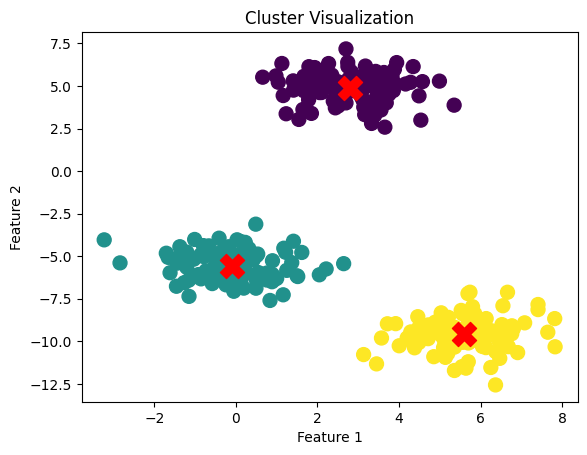

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()